In [2]:
using CSV, DataFrames

dataset_folder = "Virtual_Dataset"
files = readdir(dataset_folder)

valid_files = String[]
for file_path in files
    df = CSV.read(joinpath(dataset_folder, file_path), DataFrame)
    X = df[:, 1:end-1]
    if !any(col -> any(ismissing, col), eachcol(X)) && !any(col -> any(x -> isnan(x), col), eachcol(X))
        push!(valid_files, file_path)
        println("Valid file: ", file_path)
    else
        println("Invalid file (missing or NaN): ", file_path)
    end
end

Valid file: VirtualDataset100.csv
Valid file: VirtualDataset101.csv
Valid file: VirtualDataset42.csv
Valid file: VirtualDataset43.csv
Valid file: VirtualDataset44.csv
Valid file: VirtualDataset45.csv
Valid file: VirtualDataset46.csv
Valid file: VirtualDataset47.csv
Valid file: VirtualDataset48.csv
Valid file: VirtualDataset49.csv
Valid file: VirtualDataset50.csv
Valid file: VirtualDataset51.csv
Valid file: VirtualDataset52.csv
Valid file: VirtualDataset53.csv
Valid file: VirtualDataset54.csv
Valid file: VirtualDataset55.csv
Valid file: VirtualDataset56.csv
Valid file: VirtualDataset57.csv
Valid file: VirtualDataset58.csv
Valid file: VirtualDataset59.csv
Valid file: VirtualDataset60.csv
Valid file: VirtualDataset61.csv
Valid file: VirtualDataset62.csv
Valid file: VirtualDataset63.csv
Valid file: VirtualDataset64.csv
Valid file: VirtualDataset65.csv
Valid file: VirtualDataset66.csv
Valid file: VirtualDataset67.csv
Valid file: VirtualDataset68.csv
Valid file: VirtualDataset69.csv
Valid fi

In [3]:
using SymbolicRegression

default_options = SymbolicRegression.Options(;
    binary_operators=[+, *, /, -],
    unary_operators=[cos, exp], 
    should_optimize_constants=false,
    verbosity=0
)

optimizing_options = SymbolicRegression.Options(;
    binary_operators=[+, *, /, -], 
    unary_operators=[cos, exp], 
    should_optimize_constants=true,
    optimizer_probability=1.0,
    verbosity=0
)

Options(operators=OperatorEnum{Tuple{Tuple{typeof(cos), typeof(exp)}, Tuple{typeof(+), typeof(*), typeof(/), typeof(-)}}}(((cos, exp), (+, *, /, -))), op_constraints=([-1, -1], [(-1, -1), (-1, -1), (-1, -1), (-1, -1)]), nested_constraints=nothing, complexity_mapping=SymbolicRegression.CoreModule.OptionsStructModule.ComplexityMapping{Int64, Int64, 2}(false, (Int64[], Int64[]), 0, 0), tournament_selection_n=15, tournament_selection_p=0.982, parsimony=0.0, dimensional_constraint_penalty=nothing, dimensionless_constants_only=false, alpha=3.17, maxsize=30, maxdepth=30, turbo=Val{false}(), bumper=Val{false}(), migration=true, hof_migration=true, should_simplify=true, should_optimize_constants=true, output_directory=nothing, populations=31, perturbation_factor=0.129, annealing=true, batching=false, batch_size=50, mutation_weights=..., crossover_probability=0.0259, warmup_maxsize_by=0.0, use_frequency=true, use_frequency_in_tournament=true, adaptive_parsimony_scaling=1040.0, population_size=27

In [4]:
function run_symbolic_regression(X, y, options)
    hall_of_fame = equation_search(X, y; options=options, parallelism=:multithreading)

    dominating = calculate_pareto_frontier(hall_of_fame)
    return dominating[end].loss
end

run_symbolic_regression (generic function with 1 method)

In [5]:
function process_file(file_path)
    df = CSV.read(joinpath(dataset_folder, file_path), DataFrame)
    X = df[:, 1:end-1]
    X = collect(Matrix(X)')
    y = df[:, end]
    y = Vector(y)

    default_time = @elapsed begin
        default_loss = run_symbolic_regression(X, y, default_options)
    end

    optimizing_time = @elapsed begin
        optimizing_loss = run_symbolic_regression(X, y, optimizing_options)
    end

    println("File: ", file_path, 
        " | Optimizing Time: ", optimizing_time, "s, Loss: ", optimizing_loss,
        " | Default Time: ", default_time, "s, Loss: ", default_loss)
    return Dict(
        "file_name" => file_path, 
        "optimized_time" => optimizing_time, 
        "optimized_loss" => optimizing_loss, 
        "default_time" => default_time,
        "default_loss" => default_loss,
    )
end

process_file (generic function with 1 method)

In [6]:
using Base.Threads
using DataFrames
using Logging

eval_files = valid_files  # [1:10]  # limit to first 10 files for quicker testing

# results container (preserves order)
results = Vector{Dict{String,Any}}(undef, length(eval_files))

# println("Number of threads: ", nthreads())
for i in 1:length(eval_files)  # @threads
    # println("Processing file $(i): $(eval_files[i]) on thread $(threadid())")
    println("Processing file $(i): $(eval_files[i])")
    results[i] = process_file(eval_files[i])
end

# combine into DataFrame
hyper_big_df = DataFrame(results)
println(hyper_big_df)

Processing file 1: VirtualDataset100.csv
File: VirtualDataset100.csv | Optimizing Time: 34.781770162s, Loss: 0.0 | Default Time: 58.058352834s, Loss: 0.0
Processing file 2: VirtualDataset101.csv
File: VirtualDataset101.csv | Optimizing Time: 43.951362441s, Loss: 2.379027830857226e-33 | Default Time: 51.220395414s, Loss: 0.13298281761530917
Processing file 3: VirtualDataset42.csv
File: VirtualDataset42.csv | Optimizing Time: 35.045962141s, Loss: 0.0 | Default Time: 53.841481782s, Loss: 10.506258198754288
Processing file 4: VirtualDataset43.csv
File: VirtualDataset43.csv | Optimizing Time: 32.712372663s, Loss: 0.0 | Default Time: 50.559255278s, Loss: 0.0
Processing file 5: VirtualDataset44.csv
File: VirtualDataset44.csv | Optimizing Time: 30.791928106s, Loss: 0.0 | Default Time: 51.581382209s, Loss: 0.0
Processing file 6: VirtualDataset45.csv
File: VirtualDataset45.csv | Optimizing Time: 37.895607516s, Loss: 0.0 | Default Time: 52.914143303s, Loss: 7.55932194701733e-14
Processing file 7:

In [ ]:
# save to CSV
CSV.write("symbolic_regression_comparison.csv", hyper_big_df)

"symbolic_regression_comparison.csv"

In [2]:
using CSV, DataFrames

df = CSV.read("symbolic_regression_comparison.csv", DataFrame)

97×5 DataFrame
 Row │ file_name              default_time  optimized_loss  optimized_time  de ⋯
     │ String31               Float64       Float64         Float64         Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ VirtualDataset100.csv       58.0584     0.0                 34.7818   0 ⋯
   2 │ VirtualDataset101.csv       51.2204     2.37903e-33         43.9514   0
   3 │ VirtualDataset42.csv        53.8415     0.0                 35.046   10
   4 │ VirtualDataset43.csv        50.5593     0.0                 32.7124   0
   5 │ VirtualDataset44.csv        51.5814     0.0                 30.7919   0 ⋯
   6 │ VirtualDataset45.csv        52.9141     0.0                 37.8956   7
   7 │ VirtualDataset46.csv        53.9535     3.5812e-6           43.01     1
   8 │ VirtualDataset47.csv        54.2088     0.0                 34.1884   0
  ⋮  │           ⋮                 ⋮              ⋮               ⋮            ⋱
  91 │ Virtual_Dataset40.csv       43.2559     0.0                 25.9609   0 ⋯
  92 │ Virtual_Dataset41.csv       40.7087     0.0                 25.5901   0
  93 │ Virtual_Dataset5.csv        39.5181     0.0                 25.2923   0
  94 │ Virtual_Dataset6.csv       384.853    120.647             1951.11    64
  95 │ Virtual_Dataset7.csv        46.0506     0.0                 30.6041   0 ⋯
  96 │ Virtual_Dataset8.csv        38.7425     0.0                 25.8094   0
  97 │ Virtual_Dataset9.csv        46.313      0.0                 28.9814   0
                                                    1 column and 82 rows omitted

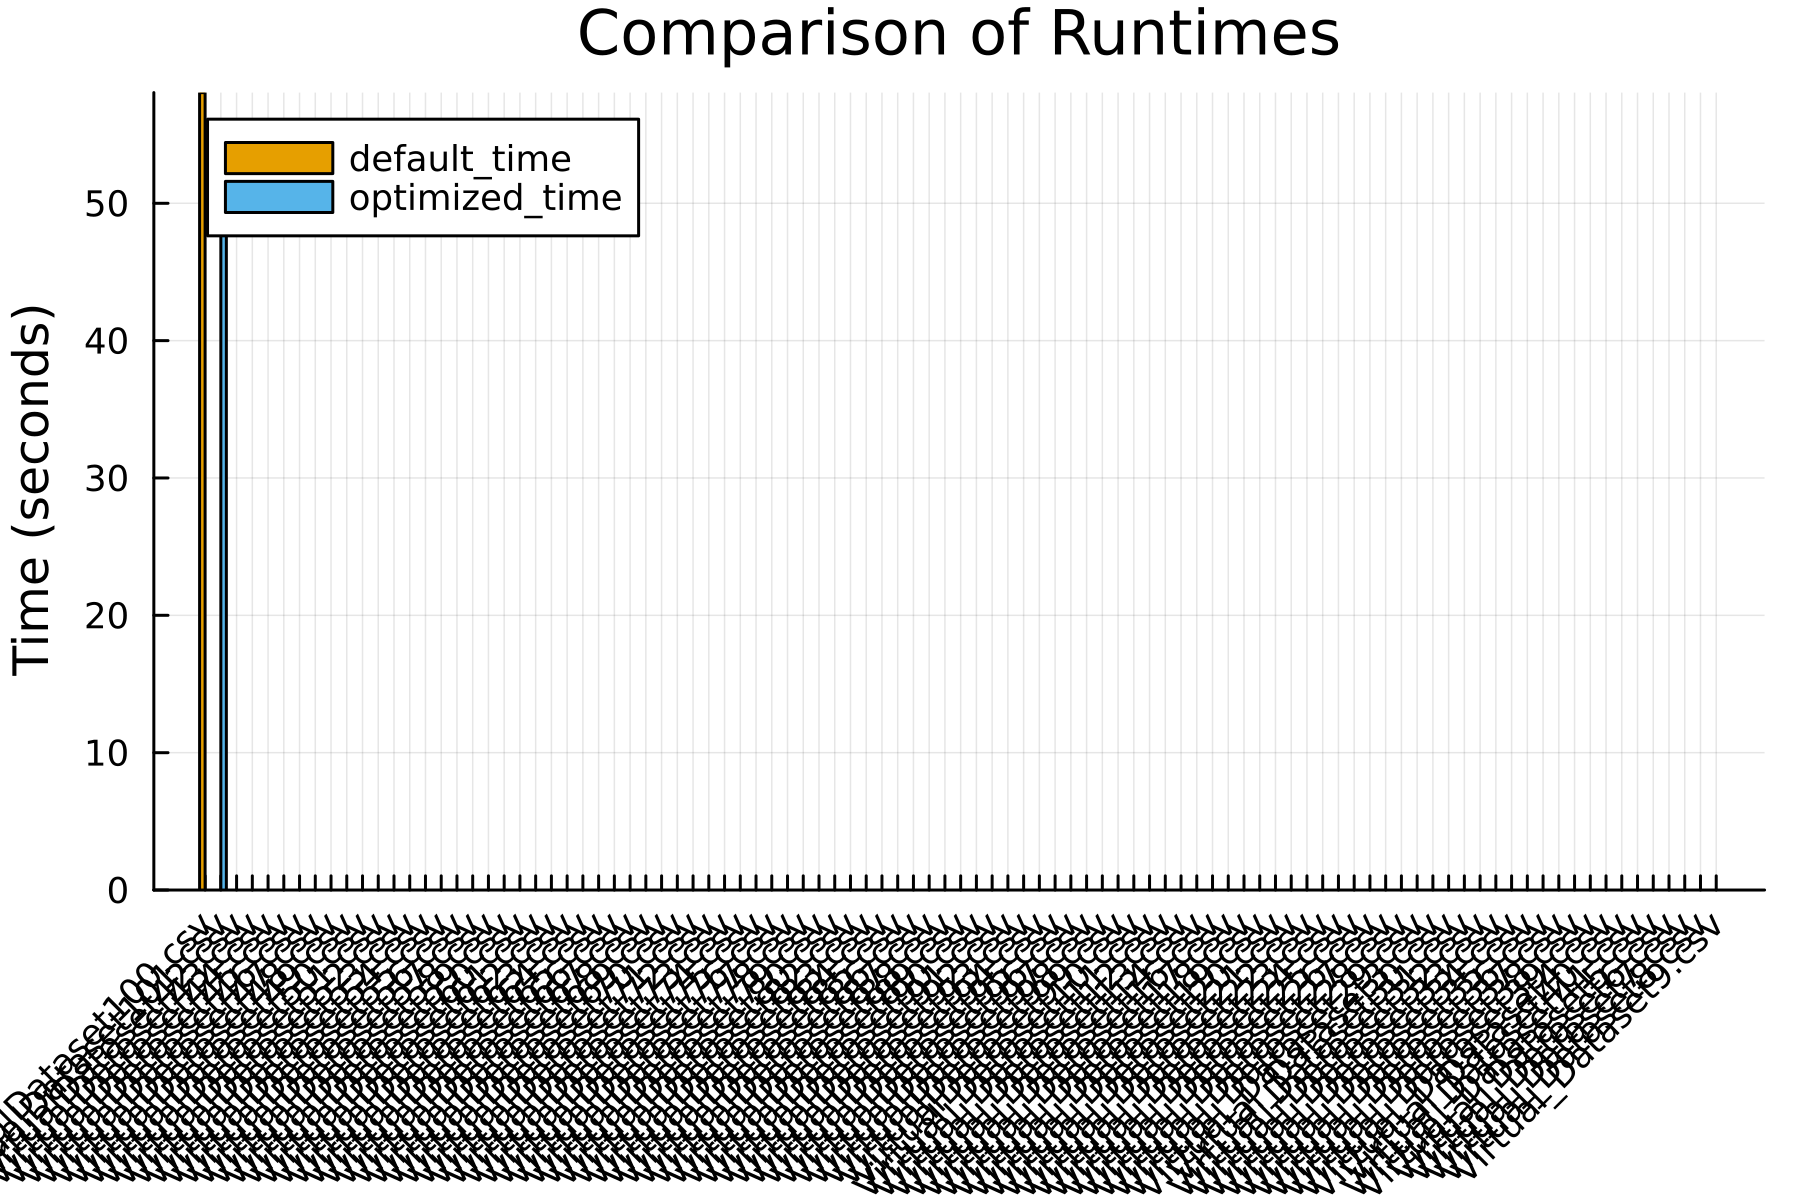

"/home/fidelius/SymbolicRegression.jl/times_comparison.png"

In [ ]:
using DataFrames
using Plots
using StatsPlots

# Set a color theme
theme(:wong)

time_plot = @df df groupedbar(
    :file_name,
    [:default_time :optimized_time],
    group = ["Default Time", "Optimized Time"],
    title = "Comparison of Runtimes",
    ylabel = "Time (seconds)",
    xlabel = "File Name",
    bar_width = 0.7,
    legend = :topleft,
    xrotation = 45,
    dpi = 300
)

display(time_plot)
savefig(time_plot, "times_comparison.png")

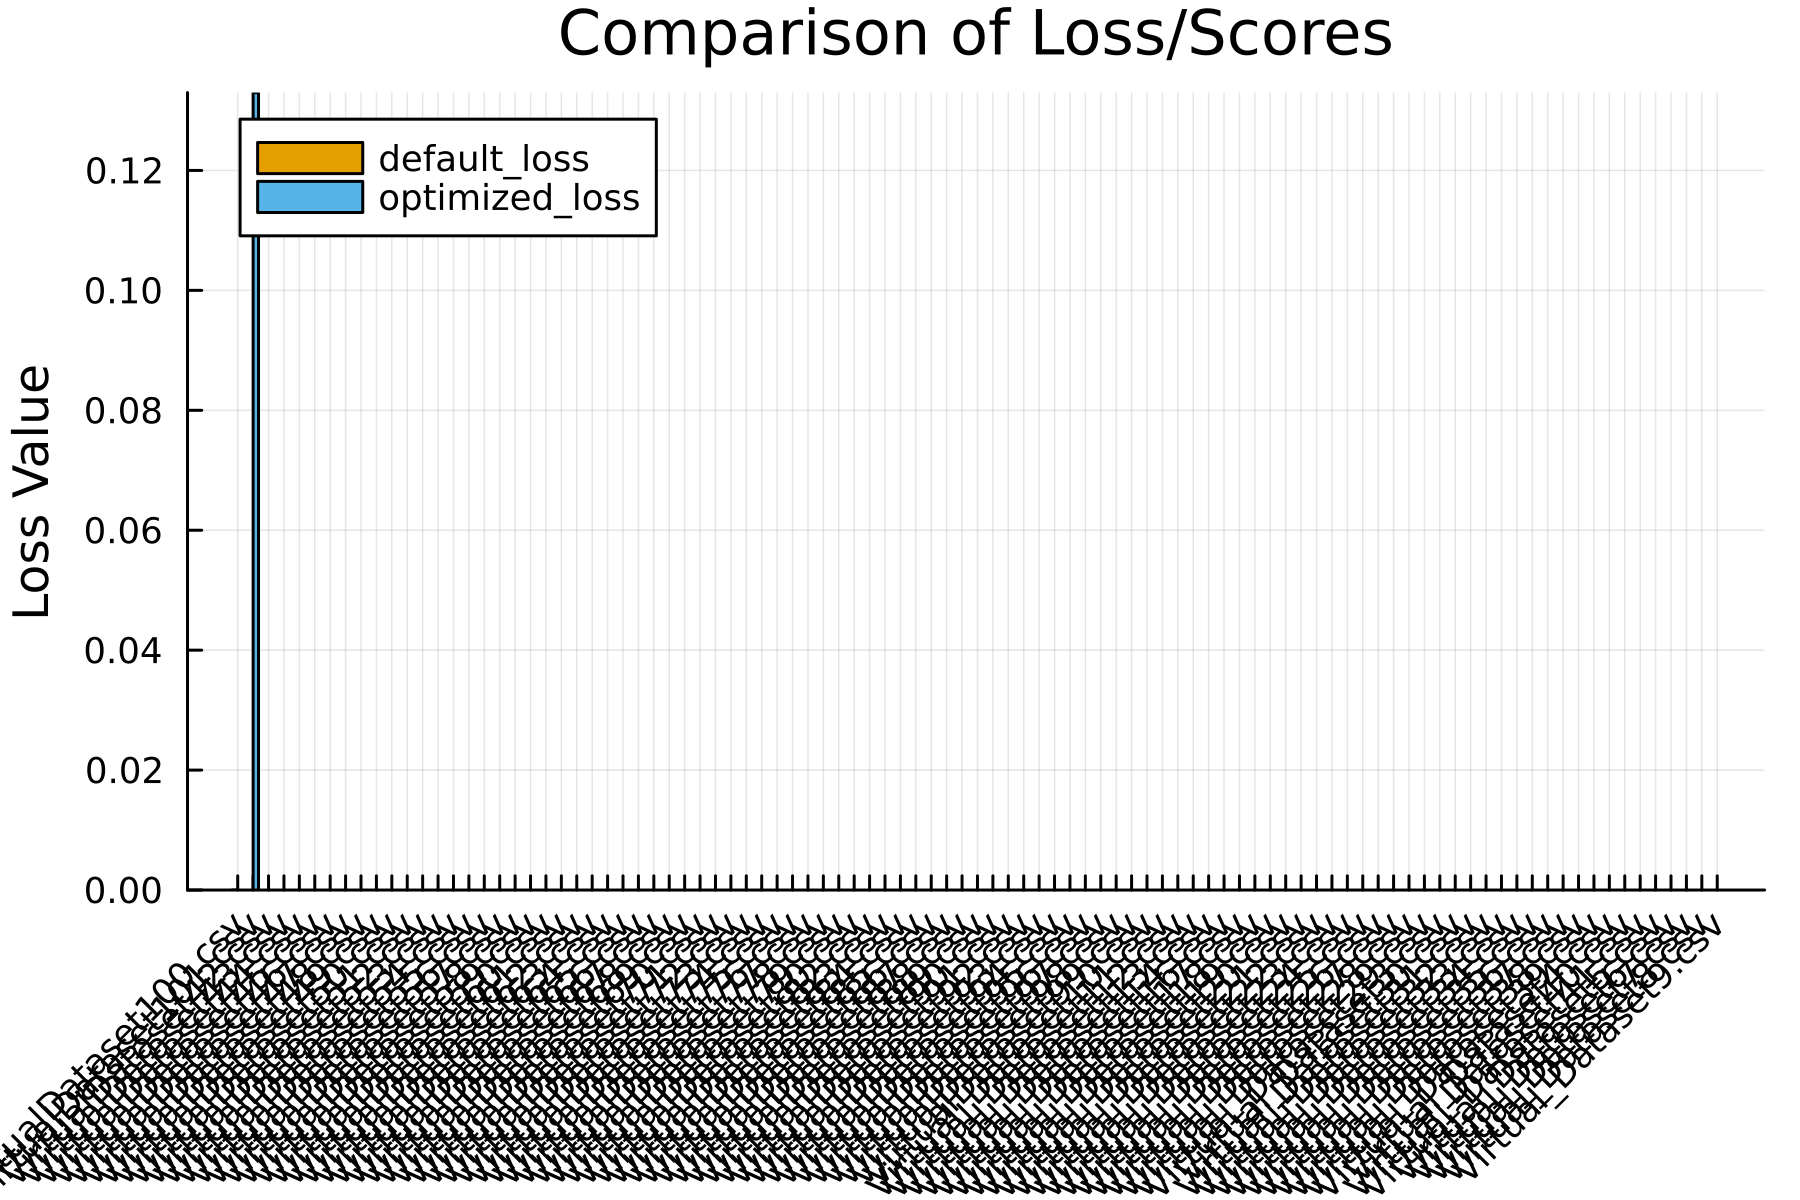

"/home/fidelius/SymbolicRegression.jl/loss_comparison.png"

In [12]:
loss_plot = @df df groupedbar(
    :file_name,
    [:default_loss :optimized_loss],
    group = ["Default Loss", "Optimized Loss"],
    title = "Comparison of Loss/Scores",
    ylabel = "Loss Value",
    xlabel = "File Name",
    bar_width = 0.7,
    legend = :topleft,
    xrotation = 45,
    dpi = 300
)

display(loss_plot)
savefig(loss_plot, "loss_comparison.png")


In [ ]:
score_plot = @df df boxplot(
    [:optimized_loss, :default_loss],
    title = "Regressor Loss Distribution",
    size = (800, 600),
    legend = false,
    ylabel = "Loss Value"
)

display(score_plot)
savefig(score_plot, "regressor_scores_boxplot.png")


"/home/fidelius/SymbolicRegression.jl/regressor_scores_boxplot.png"

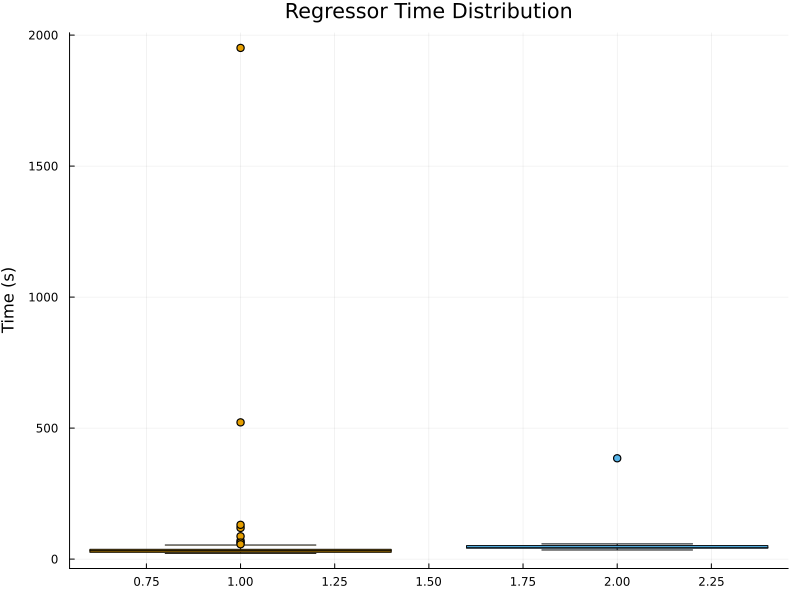

"/home/fidelius/SymbolicRegression.jl/regressor_scores_boxplot.png"

In [19]:
score_plot = @df df boxplot(
    [:optimized_time, :default_time],
    title = "Regressor Time Distribution",
    size = (800, 600),
    legend = false,
    ylabel = "Time (s)"
)

display(score_plot)
savefig(score_plot, "regressor_scores_boxplot.png")

In [22]:
using Statistics

# mean times and losses
mean_default_time = mean(df.default_time)
mean_optimized_time = mean(df.optimized_time)
mean_default_loss = mean(df.default_loss)
mean_optimized_loss = mean(df.optimized_loss)

println("Mean Default Time: ", mean_default_time)
println("Mean Optimized Time: ", mean_optimized_time)
println("Mean Default Loss: ", mean_default_loss)
println("Mean Optimized Loss: ", mean_optimized_loss)

Mean Default Time: 49.2090464897835
Mean Optimized Time: 60.0499721593299
Mean Default Loss: 3.1389764460492855e15
Mean Optimized Loss: 1.3574276076153342e14
